In [1]:
import sys
sys.path.append("../script/")

import Functions
from Engine import Engine
from GTGP import GTGP


from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import importlib
from time import time
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np
import pandas as pd
from time import time

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import shuffle
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(roc_auc_score(true_y,prob[:,1]))

# data

In [3]:
df = pd.read_csv("../data/connect-4.tsv",delimiter='\t')
X = df.iloc[:,:-1].to_numpy().astype("float")
y = df.iloc[:,-1].to_numpy().astype("int")

seeds = [10086, 200,500,30506,30405,30420,10056,7059,40965,5398,869543,83491,823190,
         48392,2810,48392,3498210,483902,859032,12890,538920,86954,54309,6504,9840,
         219805,548,2981,432890,5438908,219094,5843902,60854,979,12890,2108,4093]
train_size = 0.7
dataset = 'connect-4'

In [4]:
def to_one_hot(y,yt):
    le = LabelEncoder()
    ohe = OneHotEncoder()
    y_train = le.fit_transform(y)
    y_one_hot = ohe.fit_transform(y_train.reshape(-1,1))
    
    y_test = le.transform(yt)
    yt_one_hot = ohe.transform(y_test.reshape(-1,1))
    
    return y_train,y_test,y_one_hot,yt_one_hot

# model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[0])

learning_rate=0.1
max_depth=1
bins=8
lam=100

gtgp = GTGP(learning_rate=learning_rate,max_depth=max_depth,bins=bins,lam=lam)

total_size=10
elite_size = 3
epoch= 1000
gp_epoch= 1
verbose = 1
tolerance=0.00001

gtgp.fit(X_train,y_train,total_size=total_size,elite_size = elite_size,epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,verbose=verbose)

retrain_epoch=1
alpha=0
beta=1
gammer=0

verbose=1
gtgp.lam = 1
gtgp.retrain_estimators(X_test,y_test,retrain_epoch=retrain_epoch,alpha=alpha,beta=beta,gammer=gammer,verbose=verbose)

3 9 1
6 18 2
9 27 3
12 36 4
15 45 5
18 54 6
21 63 7
24 72 8
27 81 9
30 90 10
33 99 11
36 108 12
39 117 13
42 126 14
45 135 15
48 144 16
50 150 17
53 159 18
56 168 19
59 177 20
62 186 21
65 195 22
68 204 23
71 213 24
74 222 25
76 228 26
79 237 27
81 243 28
84 252 29
87 261 30
90 270 31
92 276 32
95 285 33
98 294 34
101 303 35
103 309 36
106 318 37
109 327 38
111 333 39
114 342 40
116 348 41
119 357 42
120 360 43
123 369 44
125 375 45
128 384 46
130 390 47
133 399 48
136 408 49
138 414 50
141 423 51
144 432 52
147 441 53
150 450 54
152 456 55
154 462 56
156 468 57
158 474 58
159 477 59
162 486 60
165 495 61
167 501 62
170 510 63
172 516 64
173 519 65
175 525 66
178 534 67
180 540 68
183 549 69
186 558 70
189 567 71
191 573 72
193 579 73
195 585 74
197 591 75
199 597 76
201 603 77
204 612 78
206 618 79
208 624 80
211 633 81
213 639 82
216 648 83
218 654 84
221 663 85
224 672 86
227 681 87
230 690 88
233 699 89
235 705 90
237 711 91
239 717 92
240 720 93
243 729 94
244 732 95
246 738 96
24

([0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.658313

In [6]:
gtgp_m1 = gtgp

<Axes: >

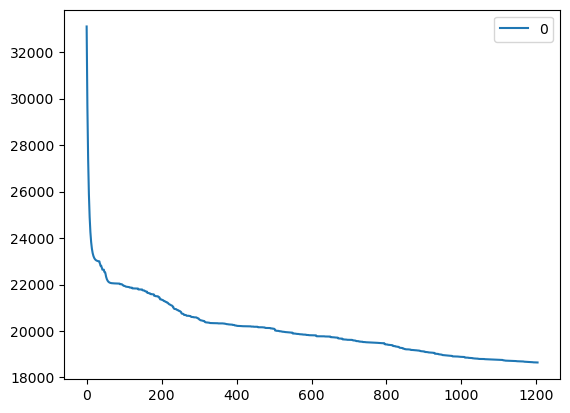

In [7]:
pd.DataFrame(gtgp_m1.train_sse).plot()

In [8]:
def fit_trees():
    learning_rate=0.1
    max_depth=1
    bins=8
    lam=100

    gtgp = GTGP(learning_rate=learning_rate,max_depth=max_depth,bins=bins,lam=lam)

    total_size=10
    elite_size = 3
    epoch= 1
    gp_epoch= 1000
    verbose = 1
    tolerance=0.00001

    gtgp.fit(X_train,y_train,total_size=total_size,elite_size = elite_size,epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,verbose=verbose)

    retrain_epoch=1
    alpha=0
    beta=1
    gammer=0

    verbose=1
    gtgp.lam = 1
    gtgp.retrain_estimators(X_test,y_test,retrain_epoch=retrain_epoch,alpha=alpha,beta=beta,gammer=gammer,verbose=verbose)

    return gtgp

for i in range(1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[i])
    gtgp = fit_trees()

    print(classification_report(y_train,np.argmax(gtgp.train_p,axis=1),digits=5))
    print(classification_report(y_test,np.argmax(gtgp.test_p,axis=1),digits=5))

    num_trees,depth,num_nodes = gtgp.print_model()

    train_acc = accuracy_score(y_train,np.argmax(gtgp.train_p,axis=1))
    test_acc = accuracy_score(y_test,np.argmax(gtgp.test_p,axis=1))
    train_f1 = f1_score(y_train,np.argmax(gtgp.train_p,axis=1),average='macro')
    test_f1 = f1_score(y_test,np.argmax(gtgp.test_p,axis=1),average='macro')


    # with open('./benchmark/'+dataset+'.csv','a') as f:
    #     s = str(train_acc)+","+str(test_acc)+","+str(train_f1)+","+str(test_f1)+","+str(num_trees)+","+str(depth)+","+str(num_nodes)+"\n"
    #     f.writelines(s)

2554 2498322 1
retrain  1 :
	train: 0.6929307027004166 20581.782231026067 	test: 0.6962699822380106 8831.530443060585
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000      4514
           1    0.61011   0.26838   0.37278     11644
           2    0.70299   0.95220   0.80884     31131

    accuracy                        0.69293     47289
   macro avg    0.43770   0.40686   0.39387     47289
weighted avg    0.61302   0.69293   0.62426     47289

              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000      1935
           1    0.62564   0.26989   0.37710      4991
           2    0.70466   0.95675   0.81158     13342

    accuracy                        0.69627     20268
   macro avg    0.44343   0.40888   0.39623     20268
weighted avg    0.61793   0.69627   0.62711     20268

----------------GTGP-------------
Number of Trees: 2554
Average of depth: 17.988645262333595
Number of nodes: 2498322


c:\Users\zhouz\anaconda3\envs\BStackGP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zhouz\anaconda3\envs\BStackGP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zhouz\anaconda3\envs\BStackGP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zhou

In [9]:
gtgp_m2 = gtgp

<Axes: >

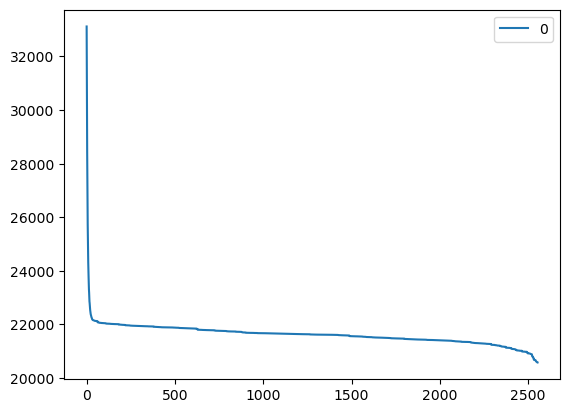

In [10]:
pd.DataFrame(gtgp_m2.train_sse).plot()

# comparison

In [11]:
gtgp_m1.print_model()
print()
print("train acc",gtgp_m1.train_acc[-1])
print("train f1",gtgp_m1.train_f1_score[-1])
print("test acc",gtgp_m1.test_acc[-1])
print("test f1",gtgp_m1.test_f1_score[-1])
gtgp_m2.print_model()
print()
print("train acc",gtgp_m2.train_acc[-1])
print("train f1",gtgp_m2.train_f1_score[-1])
print("test acc",gtgp_m2.test_acc[-1])
print("test f1",gtgp_m2.test_f1_score[-1])

----------------GTGP-------------
Number of Trees: 1204
Average of depth: 1.0
Number of nodes: 3612

train acc 0.718623781429085
train f1 0.42631416705149944
test acc 0.7168936254193803
test f1 0.4237518139515566
----------------GTGP-------------
Number of Trees: 2554
Average of depth: 17.988645262333595
Number of nodes: 2498322

train acc 0.6929307027004166
train f1 0.3938711359047112
test acc 0.6962699822380106
test f1 0.39622791039767363


In [12]:
gtgp_m1.train_acc[-1],gtgp_m1.train_f1_score[-1],gtgp_m2.train_acc[-1],gtgp_m2.train_f1_score[-1]

(0.718623781429085,
 0.42631416705149944,
 0.6929307027004166,
 0.3938711359047112)

In [13]:
gtgp_m1.train_acc[-1],gtgp_m1.train_f1_score[-1],gtgp_m2.train_acc[-1],gtgp_m2.train_f1_score[-1]

(0.718623781429085,
 0.42631416705149944,
 0.6929307027004166,
 0.3938711359047112)

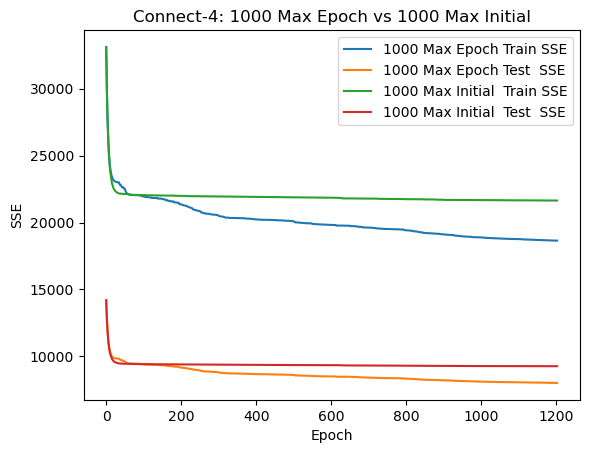

In [15]:
m1_train_sse = np.array(gtgp_m1.train_sse)
m2_train_sse = np.array(gtgp_m2.train_sse)[:m1_train_sse.shape[0]]

m1_test_sse = np.array(gtgp_m1.test_sse)
m2_test_sse = np.array(gtgp_m2.test_sse)[:m1_train_sse.shape[0]]

plt.plot(m1_train_sse)
plt.plot(m1_test_sse)
plt.plot(m2_train_sse)
plt.plot(m2_test_sse)
plt.ylabel("SSE")
plt.xlabel("Epoch")
plt.title("Connect-4: 1000 Max Epoch vs 1000 Max Initial")
plt.legend(["1000 Max Epoch Train SSE","1000 Max Epoch Test  SSE","1000 Max Initial  Train SSE","1000 Max Initial  Test  SSE"])

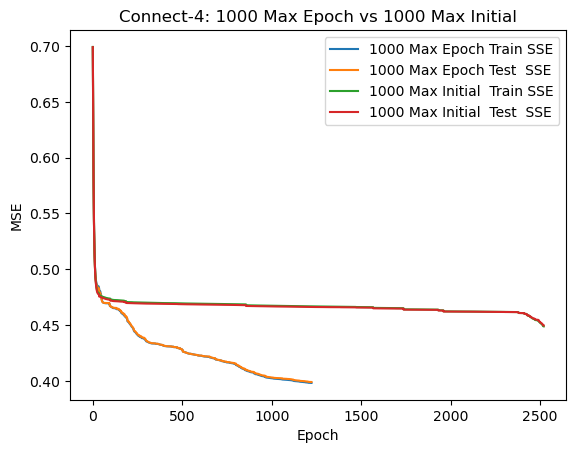

In [66]:
m1_train_sse = np.array(gtgp_m1.train_sse)/y_train.shape[0]
m2_train_sse = np.array(gtgp_m2.train_sse)/y_train.shape[0]

m1_test_sse = np.array(gtgp_m1.test_sse)/y_test.shape[0]
m2_test_sse = np.array(gtgp_m2.test_sse)/y_test.shape[0]

plt.plot(m1_train_sse)
plt.plot(m1_test_sse)
plt.plot(m2_train_sse)
plt.plot(m2_test_sse)

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.title("Connect-4: 1000 Max Epoch vs 1000 Max Initial")
plt.legend(["1000 Max Epoch Train SSE","1000 Max Epoch Test  SSE","1000 Max Initial  Train SSE","1000 Max Initial  Test  SSE"])